# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

# Criando DataFrame

In [4]:
data = pd.read_csv('dataset.csv', sep=';')

In [5]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Regiao,Pais,Product ID,Categoria,SubCategoria,Total_Vendas,Quantidade,Desconto,Lucro,Prioridade
0,CA-2012-124891,31-07-2012,RH-19495,Consumidor,New York,United States,TEC-AC-10003033,Tecnologia,Accessories,"2309,65",7,0,"762,1845",Critico
1,IN-2013-77878,05-02-2013,JR-16210,Corporativo,New South Wales,Australia,FUR-CH-10003950,Moveis,Chairs,"3709,395",9,"0,1","-288,765",Critico
2,IN-2013-71249,17-10-2013,CR-12730,Consumidor,Queensland,Australia,TEC-PH-10004664,Tecnologia,Phones,"5175,171",9,"0,1","919,971",Medio
3,ES-2013-1579342,28-01-2013,KM-16375,Home Office,Berlin,Germany,TEC-PH-10004583,Tecnologia,Phones,"2892,51",5,"0,1","-96,54",Medio
4,SG-2013-4320,05-11-2013,RH-9495,Consumidor,Dakar,Senegal,TEC-SHA-10000501,Tecnologia,Copiers,"2832,96",8,0,"311,52",Critico


In [6]:
empresa = data[['Segmento', 'Pais', 'Total_Vendas']]

In [7]:
empresa.head()

,Segmento,Pais,Total_Vendas
0,Consumidor,United States,"2309,65"
1,Corporativo,Australia,"3709,395"
2,Consumidor,Australia,"5175,171"
3,Home Office,Germany,"2892,51"
4,Consumidor,Senegal,"2832,96"


In [8]:
empresa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Segmento      51290 non-null  object
 1   Pais          51290 non-null  object
 2   Total_Vendas  51290 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


# Explorando o DataFrame

In [9]:
empresa["Total_Vendas"] = empresa["Total_Vendas"].str.replace(',','.')

<ipython-input-9-ed4105779b0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresa["Total_Vendas"] = empresa["Total_Vendas"].str.replace(',','.')


In [10]:
empresa["Total_Vendas"] = pd.to_numeric(empresa["Total_Vendas"])

<ipython-input-10-579ed996e052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresa["Total_Vendas"] = pd.to_numeric(empresa["Total_Vendas"])


In [11]:
empresa["Total_Vendas"].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Total_Vendas, dtype: float64

In [12]:
empresa[['Segmento']].drop_duplicates()

,Segmento
0,Consumidor
1,Corporativo
3,Home Office


In [13]:
empresa.dropna()

,Segmento,Pais,Total_Vendas
0,Consumidor,United States,2309.650
1,Corporativo,Australia,3709.395
2,Consumidor,Australia,5175.171
3,Home Office,Germany,2892.510
4,Consumidor,Senegal,2832.960
...,...,...,...
51285,Corporativo,Japan,65.100
51286,Consumidor,United States,0.444
51287,Home Office,United States,22.920
51288,Home Office,Brazil,13.440


In [14]:
empresa['Pais_num'] = empresa['Pais'].apply(lambda Pais: 1 if Pais == 'Brazil' else 0) 

<ipython-input-14-1371a073679c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresa['Pais_num'] = empresa['Pais'].apply(lambda Pais: 1 if Pais == 'Brazil' else 0)


In [15]:
empresa_limpo = empresa[['Pais_num', 'Total_Vendas', 'Segmento']]

In [16]:
empresa_limpo = empresa.loc[empresa['Pais']=='Brazil'].drop_duplicates()

In [17]:
empresa_limpo = empresa_limpo.drop(columns=['Pais'])

In [18]:
empresa_limpo.head()

,Segmento,Total_Vendas,Pais_num
13,Home Office,2221.80,1
140,Home Office,2297.96,1
255,Home Office,1236.48,1
267,Consumidor,897.48,1
303,Home Office,2332.96,1


# Visualização do Dataframe

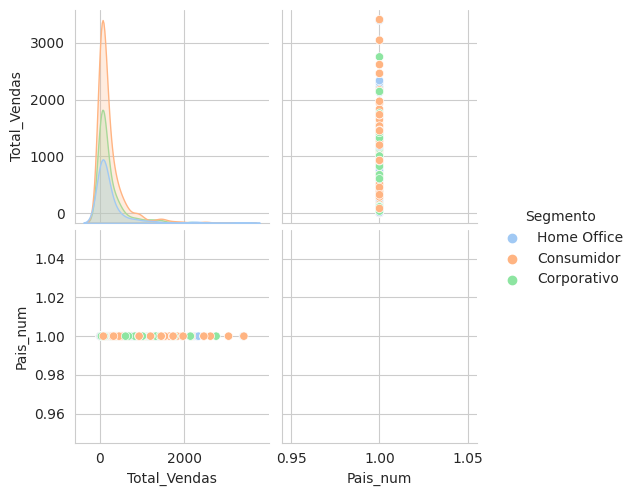

In [19]:
with sns.axes_style('whitegrid'):
  grafico = sns.pairplot(data=empresa_limpo, hue="Segmento", palette="pastel")

[Text(0.5, 1.0, 'Preço de Venda por Segmento'),
 Text(0.5, 0, 'Segmento'),
 Text(0, 0.5, 'Total de Vendas')]

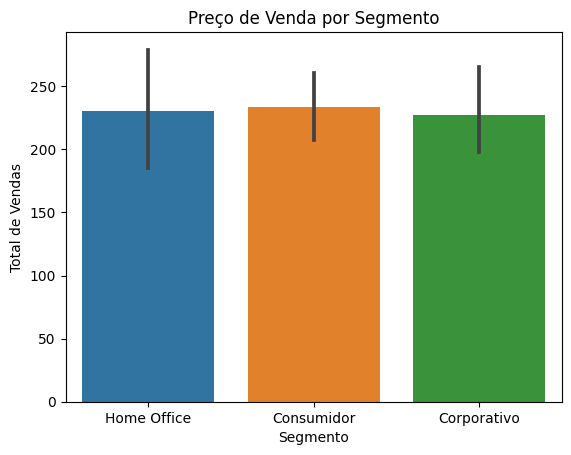

In [20]:
grafico1 = sns.barplot(data=empresa_limpo, x='Segmento', y='Total_Vendas')
grafico1.set(title='Preço de Venda por Segmento', xlabel='Segmento', ylabel='Total de Vendas')

[Text(0.5, 1.0, 'Segmento de Venda por Região'),
 Text(0.5, 0, 'Segmento das vendas'),
 Text(0, 0.5, 'Estado')]

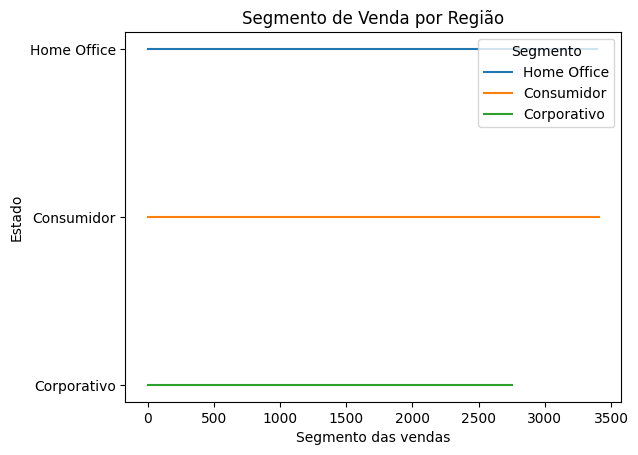

In [21]:
grafico2 = sns.lineplot(data=empresa_limpo, x='Total_Vendas', y='Segmento', hue='Segmento')
grafico2.set(title='Segmento de Venda por Região', xlabel='Segmento das vendas', ylabel='Estado')

In [22]:
Corporativo = empresa_limpo.loc[empresa_limpo["Segmento"]=="Corporativo"].agg('sum')
print(Corporativo)

Segmento        CorporativoCorporativoCorporativoCorporativoCo...
Total_Vendas                                         101248.10524
Pais_num                                                      445
dtype: object


In [23]:
home_office = empresa_limpo.loc[empresa_limpo["Segmento"]=="Home Office"].agg('sum')
print(home_office)

Segmento        Home OfficeHome OfficeHome OfficeHome OfficeHo...
Total_Vendas                                          66657.85272
Pais_num                                                      289
dtype: object


In [24]:
Consumidor = empresa_limpo.loc[empresa_limpo["Segmento"]=="Consumidor"].agg('sum')
print(Consumidor)

Segmento        ConsumidorConsumidorConsumidorConsumidorConsum...
Total_Vendas                                         183322.59276
Pais_num                                                      785
dtype: object


# Treino / Teste

In [26]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    empresa_limpo.drop(['Segmento'], axis = 1),
    empresa_limpo['Segmento'],
    test_size=0.3,
    random_state=123
)

In [27]:
predictors_train.head()

,Total_Vendas,Pais_num
46704,16.48,1
13698,78.00,1
21343,199.44,1
7556,250.20,1
19531,305.06,1


In [28]:
predictors_train.shape

(1063, 2)

In [29]:
predictors_test.head()

,Total_Vendas,Pais_num
51076,6.34,1
45978,24.30,1
1275,467.04,1
41779,23.48,1
38488,14.56,1


In [30]:
target_test.head()

51076     Consumidor
45978    Corporativo
1275     Corporativo
41779     Consumidor
38488    Home Office
Name: Segmento, dtype: object

In [31]:
target_test.shape

(456,)

# Modelagem

In [32]:
model = DecisionTreeClassifier()

In [33]:
model = model.fit(predictors_train, target_train)

In [34]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Total_Vendas', 'Pais_num'], dtype=object),
 'n_features_in_': 2,
 'n_outputs_': 1,
 'classes_': array(['Consumidor', 'Corporativo', 'Home Office'], dtype=object),
 'n_classes_': 3,
 'max_features_': 2,
 'tree_': <sklearn.tree._tree.Tree at 0x7fea394ee6b0>}

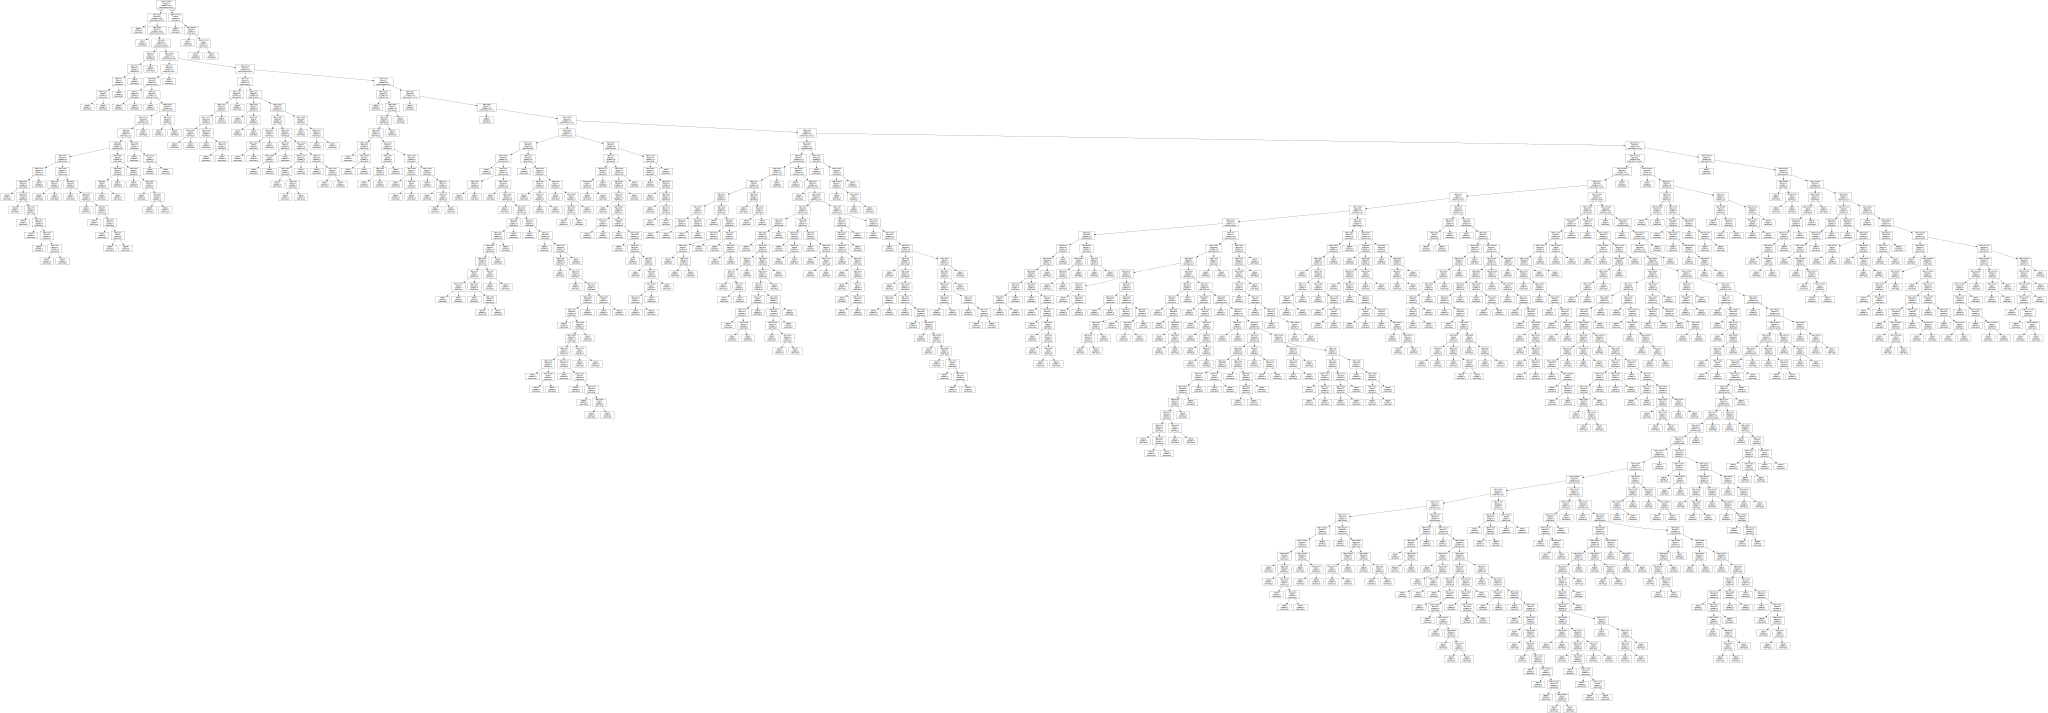

In [35]:
tree_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(tree_data)
graph

# Avaliação do Modelo

In [36]:
target_predicted = model.predict(predictors_test)

In [37]:
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[127  66  53]
 [ 83  29  20]
 [ 47  23   8]]


In [38]:
total = confusion_matrix.sum()
print(total)

456


In [39]:
acertos = np.diag(confusion_matrix).sum()
print(acertos)

164


In [40]:
acuracia = acertos / total 
print(acuracia)

0.35964912280701755


In [41]:
print(f"{round(100 * acuracia, 2)}%")

35.96%


# Predição

In [42]:
empresa_limpo.head(1)

,Segmento,Total_Vendas,Pais_num
13,Home Office,2221.8,1


In [43]:
features = np.array([3500, 1]) 
prediction = model.predict(features.reshape(1, -1)) 
print(prediction)

['Home Office']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
